In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [10]:
# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)

#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
#Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Predict the values using the test set
y_pred = model.predict(X_test)

Text(0, 0.5, 'Residuals')

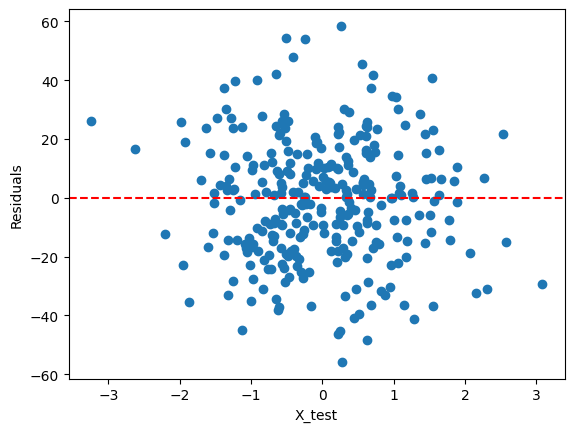

In [12]:
#Residuals
residual = y_test - y_pred

#Plot the resdiuals
plt.scatter(X_test, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("X_test")
plt.ylabel("Residuals")

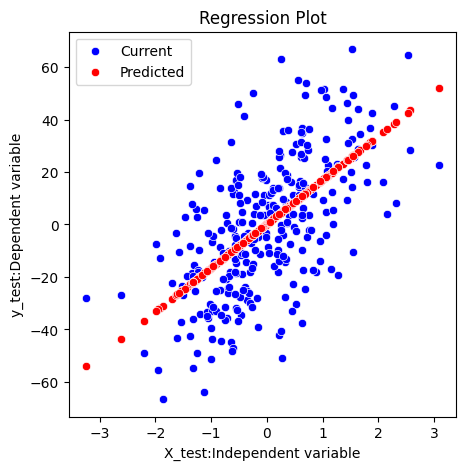

In [13]:
#Plotting data and regression
plt.figure(figsize=(5,5))
sns.scatterplot(x=X_test.flatten(), y=y_test, label="Current", color='blue')
sns.scatterplot(x=X_test.flatten(), y=y_pred, label="Predicted", color='red')
plt.xlabel('X_test:Independent variable')
plt.ylabel('y_test:Dependent variable')
plt.title('Regression Plot')
plt.legend()
plt.show()

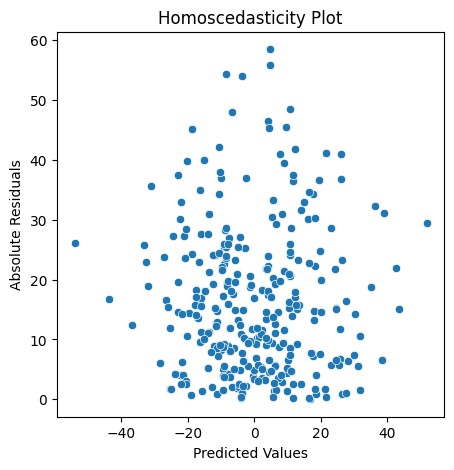

In [14]:
# Plot: Homoscedasticity
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=np.abs(residual))
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Homoscedasticity Plot')
plt.show()

In [16]:
#Generate dataset
np.random.seed(42)
X_example = np.random.rand(200, 1) * 100
y_example = 2 * X_example.squeeze() + np.random.normal(X_example.squeeze(),200)

#Split in test and train
X_train, X_test, y_train, y_test = train_test_split(X_example, y_example, test_size=0.3, random_state=42)

#Train a model
model_h = LinearRegression()
model_h.fit(X_train, y_train)

#Predict the values
y_pred_h = model_h.predict(X_test)

<Axes: >

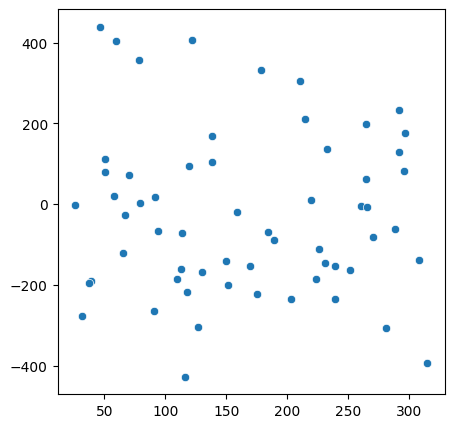

In [17]:
# Plot residual
residuals_h = y_test - y_pred_h
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred_h, y=residuals_h)

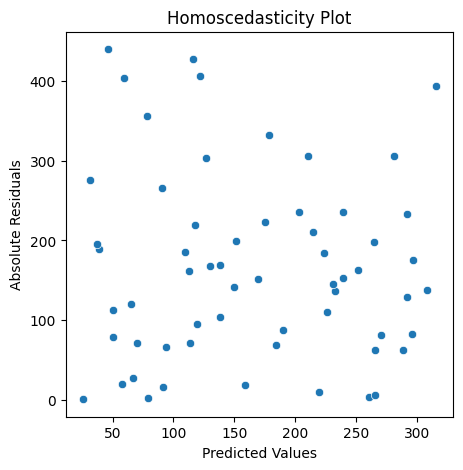

In [18]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred_h, y=np.abs(residuals_h))
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Homoscedasticity Plot')
plt.show()

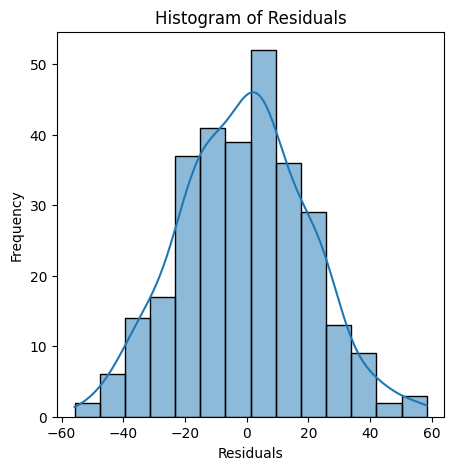

In [20]:
#Plot normality of residuals
plt.figure(figsize=(5, 5))
sns.histplot(residual, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

<Figure size 500x500 with 0 Axes>

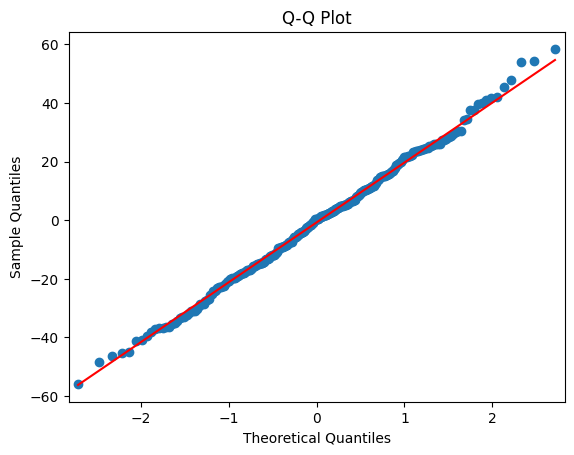

In [22]:
# Plot Q-Q plot
plt.figure(figsize=(5, 5))
sm.qqplot(residual, line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot')
plt.show()